In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
pd_data = pd.read_excel("PD_dataset.xlsx")
pd_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [38]:
pd_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [39]:
Corr_ = pd_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'status']].corr()['status']
Corr_

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
status              1.000000
Name: status, dtype: float64

In [40]:
Corr_List = []
for val in Corr_:
    Corr_List.append(abs(val))
Corr_List.pop() # Pop the last one 'status' as status to status always gives 1.00
Corr_List

[0.3835351511879843,
 0.16613634721043585,
 0.38020043070127174,
 0.2782195982792976,
 0.33865309807934696,
 0.26666755653419655,
 0.28869834669063865,
 0.2666460942115804,
 0.3674298598935418,
 0.35069690571747497,
 0.34761696522403324,
 0.35114843593802664,
 0.3643157392231119,
 0.34760835453797745,
 0.18942931888728265,
 0.3615148666997222,
 0.30856725130270324,
 0.23173927276037876,
 0.5648379969876431,
 0.4548421261086424,
 0.34023150988036377,
 0.5310391538731207]

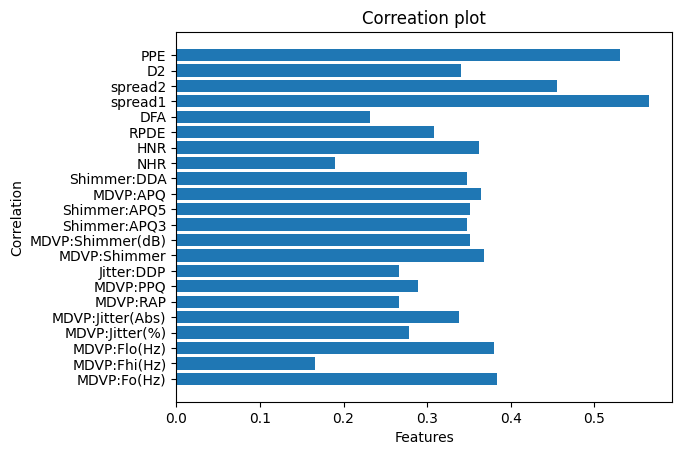

In [44]:
labels = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
plt.barh(labels,Corr_List)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correation plot')
plt.show()

In [45]:
# As more or less all the Features contribute significantly to the final classification we have to train the model with all the features

In [52]:
# As the Classification task needs us to classify them in binary form we use Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(pd_data[labels],pd_data['status'],test_size = 0.2,random_state = 0)

In [56]:
model = LogisticRegression()
model.fit(X_train,Y_train)

c:\Users\M.K.Suriya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = model.predict(X_test) # Prediction for Test data

In [59]:
# Accuracy Score
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.90
Confusion Matrix:
 [[ 7  3]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39



In [63]:
# To create a final Dataframe for Test data , actual and predicted result
Actual = pd.DataFrame({'Actual result':Y_test, 'Predicted reult':y_pred})
Final_result = pd.concat([X_test,Actual],axis=1)
Final_result

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Actual result,Predicted reult
83,98.804,102.305,87.804,0.00432,0.000040,0.00247,0.00258,0.00742,0.02223,0.202,...,0.00882,22.244,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275,1,1
12,136.926,159.866,131.276,0.00293,0.000020,0.00118,0.00153,0.00355,0.01259,0.112,...,0.00581,25.703,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512,1,1
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141,0,0
113,210.141,232.706,185.258,0.00534,0.000030,0.00321,0.00280,0.00964,0.01680,0.149,...,0.00620,23.671,0.441097,0.722254,-5.963040,0.250283,2.489191,0.177807,1,1
171,112.547,133.374,105.715,0.00355,0.000030,0.00166,0.00190,0.00499,0.01358,0.129,...,0.00435,26.436,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376,0,1
134,106.516,112.777,93.105,0.00589,0.000060,0.00291,0.00319,0.00873,0.04932,0.441,...,0.03031,17.060,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080,1,1
163,112.150,131.669,97.527,0.00519,0.000050,0.00291,0.00284,0.00873,0.01756,0.155,...,0.01435,21.219,0.557045,0.673086,-5.617124,0.184896,1.871871,0.212386,1,1
124,156.239,195.107,79.820,0.00694,0.000040,0.00403,0.00395,0.01209,0.02343,0.224,...,0.02020,19.196,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988,1,0
74,110.793,128.101,107.316,0.00494,0.000040,0.00260,0.00283,0.00780,0.02442,0.216,...,0.00479,25.438,0.437031,0.815908,-5.313360,0.201861,2.225815,0.244512,1,1
18,153.046,175.829,68.623,0.00742,0.000050,0.00364,0.00432,0.01092,0.05517,0.542,...,0.03160,17.280,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429,1,1
